<a href="https://colab.research.google.com/github/borja-izquierdo/portfolio/blob/main/Logarithmic_Price_Scale_Indices_Returns_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt

In [2]:
#Declaring the data range for our stock  returns (using timedelta)

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*10)
endDate, startDate

(datetime.datetime(2023, 11, 14, 16, 48, 39, 806115),
 datetime.datetime(2013, 11, 16, 16, 48, 39, 806115))

In [3]:
#Creating a list of the indexes

indeces = ['NVDA','QCOM','AMD']

In [4]:
#Downloading the indeces data from Yahoo Finance

df = yf.download(indeces, start = startDate, end = endDate)

[*********************100%%**********************]  3 of 3 completed


In [5]:
#Let's take a look at whats in the dataframe

df.head()

Adj Close                      Close                     High  \
                 AMD      NVDA       QCOM   AMD    NVDA       QCOM   AMD   
Date                                                                       
2013-11-18      3.47  3.702131  53.793991  3.47  3.9450  71.940002  3.54   
2013-11-19      3.42  3.641982  53.719208  3.42  3.8600  71.839996  3.48   
2013-11-20      3.42  3.587730  53.113510  3.42  3.8025  71.029999  3.46   
2013-11-21      3.37  3.616035  53.622005  3.37  3.8325  71.709999  3.44   
2013-11-22      3.34  3.580653  54.556705  3.34  3.7950  72.959999  3.39   

                                Low                     Open          \
              NVDA       QCOM   AMD    NVDA       QCOM   AMD    NVDA   
Date                                                                   
2013-11-18  3.9900  72.300003  3.47  3.9350  71.720001  3.53  3.9550   
2013-11-19  3.9400  72.430000  3.36  3.8550  71.730003  3.46  3.9050   
2013-11-20  3.8725  72.400002  3.40  3.7950  70.910004  3.44  3.8625   
2013-11-21  3.8400  71.809998  3.35  3.7900  70.400002  3.43  3.8075   
2013-11-22  3.8375  73.089996  3.33  3.7875  71.870003  3.38  3.8375   

                         Volume                      
                 QCOM       AMD      NVDA      QCOM  
Date                                                 
2013-11-18  72.279999  13170900  31694800  10955800  
2013-11-19  72.180000  20169800  20671600  10544800  
2013-11-20  71.949997   9937400  20477600  15105700  
2013-11-21  70.400002  13646200  21356800  13592000  
2013-11-22  71.910004  11315300  15866800  12561200

In [6]:
#Selecting only 'Adj Close' prices

adj_close_prices = df['Adj Close']
adj_close_prices.head()

,AMD,NVDA,QCOM
Date,,,
2013-11-18,3.47,3.702131,53.793991
2013-11-19,3.42,3.641982,53.719208
2013-11-20,3.42,3.587730,53.113510
2013-11-21,3.37,3.616035,53.622005
2013-11-22,3.34,3.580653,54.556705


In [7]:
#Calculating the anual returns

log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()


,AMD,NVDA,QCOM
Date,,,
2013-11-18,NaN,NaN,NaN
2013-11-19,-0.014514,-0.016380,-0.001391
2013-11-20,0.000000,-0.015008,-0.011339
2013-11-21,-0.014728,0.007859,0.009528
2013-11-22,-0.008942,-0.009833,0.017281


In [8]:
#Calculating the cumulative returns

cumulative_log_returns = log_returns.cumsum()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

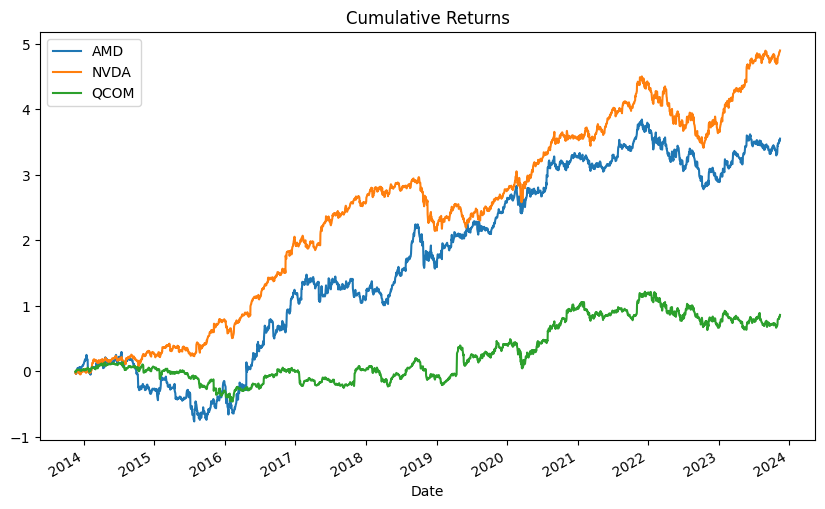

In [9]:
#Plotting the cumulative returns

cumulative_log_returns.plot(title = 'Cumulative Returns', figsize =(10,6))